##### 3 .Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [1]:
# Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.read_csv('data.csv')     # Reading Dataset

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [3]:
dataset = pd.read_csv('data.csv')  # Storing data into dataset variable.

In [4]:
dataset.isnull().sum()      # Checking Null Values

Patient ID                       0
 Blood Pressure Before (mmHg)    0
 Blood Pressure After (mmHg)     0
dtype: int64

- No Missing Values in the dataset.

In [5]:
dataset['Patient ID'].unique()      # Displaying unique value of Patient Id Column

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

- Dropping ***Patient ID*** column which is not in use.

In [6]:
dataset.drop('Patient ID',axis=1,inplace=True)

In [7]:
dataset.head()      # Top 5 records of the dataset.

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,130,120
1,142,135
2,120,118
3,135,127
4,148,140


In [8]:
dataset.columns     # Displaying column name

Index([' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)'], dtype='object')

In [9]:
# Rename the columns for better understanding.

dataset.rename(columns = {' Blood Pressure Before (mmHg)': 'Blood Pressure Before',
                          ' Blood Pressure After (mmHg)': 'Blood Pressure After'}, inplace = True)

In [10]:
dataset.head()      # Top 5 records of the dataset.

,Blood Pressure Before,Blood Pressure After
0,130,120
1,142,135
2,120,118
3,135,127
4,148,140


##### a. Measure the dispersion in both and interpret the results.

In [11]:
dispersion_before = np.var(dataset['Blood Pressure Before'])
print("Dispersion in Blood Pressure Before is", dispersion_before)

Dispersion in Blood Pressure Before is 43.10189999999998


In [12]:
dispersion_after = np.var(dataset['Blood Pressure After'])
print("Dispersion in Blood Pressure After is", dispersion_after)

Dispersion in Blood Pressure After is 46.97040000000002


##### b. Calculate mean and 5% confidence interval and plot it in a graph

In [13]:
mean_before = np.mean(dataset['Blood Pressure Before'])
mean_after = np.mean(dataset['Blood Pressure After'])

In [14]:
conf_interval_before = stats.t.interval(0.95, len(dataset['Blood Pressure Before'])-1, loc=mean_before, scale=stats.sem(dataset['Blood Pressure Before']))
conf_interval_after = stats.t.interval(0.95, len(dataset['Blood Pressure After'])-1, loc=mean_after, scale=stats.sem(dataset['Blood Pressure After']))

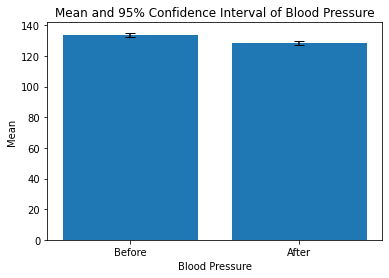

In [15]:
plt.bar(['Before', 'After'], [mean_before, mean_after], yerr=[conf_interval_before[1]-mean_before, conf_interval_after[1]-mean_after], capsize=5)
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Mean and 95% Confidence Interval of Blood Pressure')
plt.show()

##### c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [16]:
mad_before = np.mean(np.abs(dataset['Blood Pressure Before'] - np.mean(dataset['Blood Pressure Before'])))
print("Mean Absolute Deviation of Blood Pressure Before is", mad_before)

Mean Absolute Deviation of Blood Pressure Before is 5.7118


In [17]:
mad_after = np.mean(np.abs(dataset['Blood Pressure After'] - np.mean(dataset['Blood Pressure After'])))
print("Mean Absolute Deviation of Blood Pressure After is", mad_after)

Mean Absolute Deviation of Blood Pressure After is 5.9


In [18]:
std_dev_before = np.std(dataset['Blood Pressure Before'])
print("Standard Deviation of Blood Pressure Before is", std_dev_before)

Standard Deviation of Blood Pressure Before is 6.5652037287505385


In [19]:
std_dev_after = np.std(dataset['Blood Pressure After'])
print("Standard Deviation of Blood Pressure After is", std_dev_after)

Standard Deviation of Blood Pressure After is 6.853495458523338


#### d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [20]:
correlation_coeff = np.corrcoef(dataset['Blood Pressure Before'], dataset['Blood Pressure After'])[0, 1]
print("Correlation Coefficient between Blood Pressure Before and Blood Pressure After is", correlation_coeff)

Correlation Coefficient between Blood Pressure Before and Blood Pressure After is 0.9779485966556016


In [21]:
significance = stats.pearsonr(dataset['Blood Pressure Before'], dataset['Blood Pressure After'])[1]
print("Significance of the correlation coefficient at 1% level is", significance)

Significance of the correlation coefficient at 1% level is 1.809738143305946e-68
